In [58]:
from collections import defaultdict

import numpy as np
from PIL import Image
import cv2

from sklearn.neighbors import KNeighborsClassifier

%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display

# La classification

#### Plan

 1. Importation du dataset
 1. Exploration du dataset
 1. Utilisation du classifier KNeighborsClassifier (sklearn)
 1. Création d'un classifier avec KNN
 1. Utilisation du classifier créé

## Importation du dataset

Après avoir défini le chemin d'accès au dataset et de la fonction pour importer les données, nous chargeons :
 1. Les données d'apprentissage
 1. Les données de test
 1. Les labels

In [59]:
path = "../data/datasets/cifar10/test/cifar-10-batches-py/"

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [60]:
X = unpickle(path + 'data_batch_1')
img_data = X['data']
img_label_orig = img_label = X['labels']
img_label = np.array(img_label).reshape(-1, 1)

sample_img_data = img_data[0:10, :]

In [61]:
test_X = unpickle(path + 'test_batch')
test_data = test_X['data']
test_label = test_X['labels']
test_label = np.array(test_label).reshape(-1, 1)

In [62]:
batch = unpickle(path + 'batches.meta')
meta = batch['label_names']

In [63]:
print('shape of a picture')
print(sample_img_data.shape)
print('number of sample in train dataset')
print(img_label.shape)
print('the labels', meta)

shape of a picture
(10, 3072)
number of sample in train dataset
(10000, 1)
the labels ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Exploration du dataset

Nous affichons les 10 premières images du _train dataset_. Puis une prédiction des classes pour 10 autres images.

In [64]:
def default_label_fn(i, original):
    return original

def show_img(img_arr, label_arr, meta, index, label_fn=default_label_fn):
    """
    Given a numpy array of image from CIFAR-10 labels this method transform the data so that PIL can read and show
    the image.
    Check here how CIFAR encodes the image http://www.cs.toronto.edu/~kriz/cifar.html
    """
    
    one_img = img_arr[index, :] # Assume image size is 32 x 32. First 1024 px is r, next 1024 px is g, last 1024 px is b from the (r,g b) channel
    r = one_img[:1024].reshape(32, 32)
    g = one_img[1024:2048].reshape(32, 32)
    b = one_img[2048:].reshape(32, 32)
    rgb = np.dstack([r, g, b])
    img = Image.fromarray(np.array(rgb), 'RGB')
    display(img)
    print(label_fn(index, meta[label_arr[index][0]]))

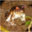

frog


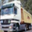

truck


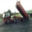

truck


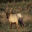

deer


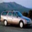

automobile


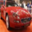

automobile


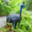

bird


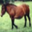

horse


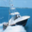

ship


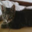

cat


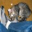

cat::deer


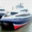

ship::ship


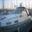

ship::ship


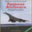

airplane::airplane


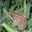

frog::dog


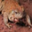

frog::bird


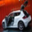

automobile::cat


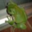

frog::bird


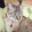

cat::bird


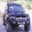

automobile::ship


In [65]:
for i in range(0, 10):
    show_img(sample_img_data, img_label, meta, i)

from sklearn.neighbors import KNeighborsClassifier

def pred_label_fn(i, original):
    return original + '::' + meta[YPred[i]]
    
data_point_no = 10
sample_test_data = test_data[:data_point_no, :]
nbrs = KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(img_data, img_label_orig)
YPred = nbrs.predict(sample_test_data)
for i in range(0, len(YPred)):
    show_img(sample_test_data, test_label, meta, i, label_fn = pred_label_fn)

In [78]:
class KNeighborsClassifier:
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
    
    def dist_calcul(self, vector1, vector2):
        return np.linalg.norm(vector1-vector2)
    
    def fit(self, data, labels):
        self.images = data
        self.labels = labels
        
    def get_labels(self, dist_list):
        string_label = ""
        for _, idx in dist_list:
            string_label += meta[self.labels[idx]] + " "
        return string_label
        
    def predict(self, data):
        dist_list = []
        for i, image in enumerate(self.images):
            dist = self.dist_calcul(image, data)
            dist_list.append((dist, i))
            
        dist_list = sorted(dist_list, key=lambda item: item[0], reverse=True)
        dist_list = dist_list[:self.n_neighbors]
        
        return self.get_labels(dist_list)
        
    def predict_max(self, data):
        dist_list = []
        for i, image in enumerate(self.images):
            dist = self.dist_calcul(image, data)
            dist_list.append((dist, i))
            
        dist_list = sorted(dist_list, key=lambda item: item[0])
        dist_list = dist_list[:self.n_neighbors]
        
        labels = list(map(lambda item: item[1], dist_list))
        result = max(labels, key=labels.count)
        
        return meta[self.labels[result]]

airplane


<IPython.core.display.Javascript object>


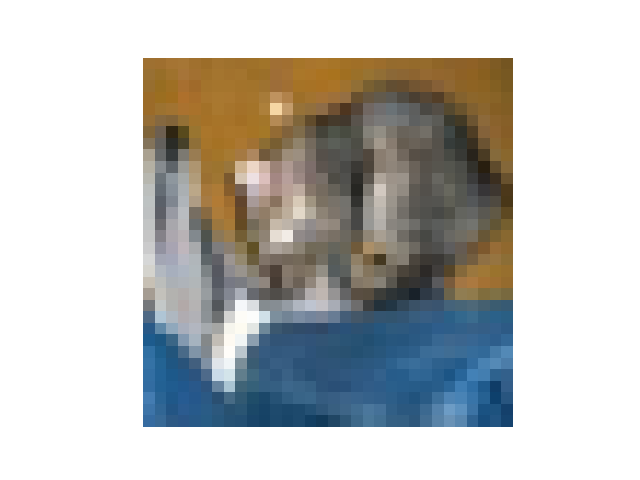

truck


<IPython.core.display.Javascript object>


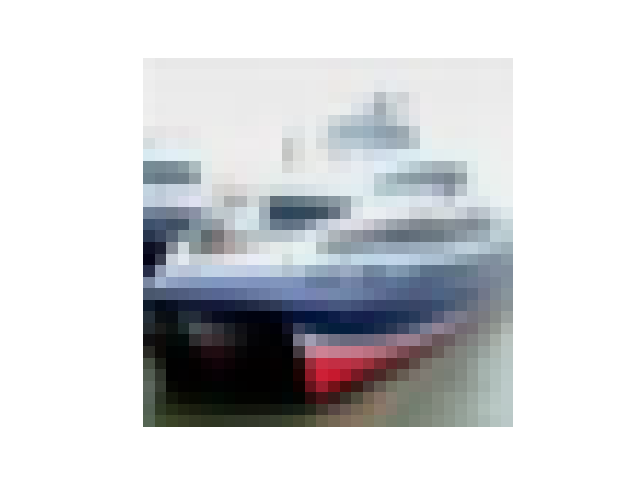

ship


<IPython.core.display.Javascript object>


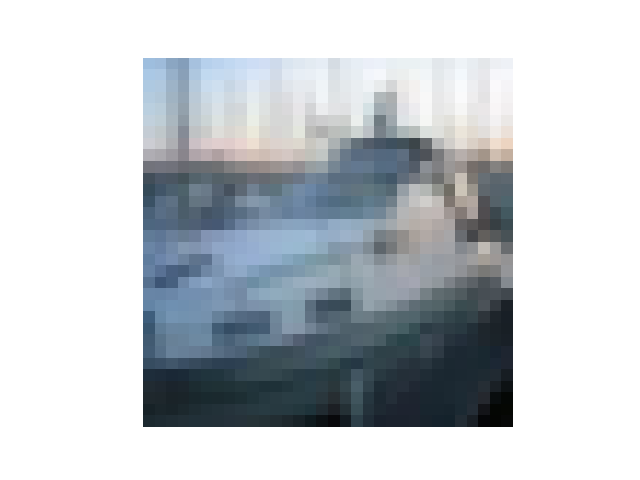

airplane


<IPython.core.display.Javascript object>


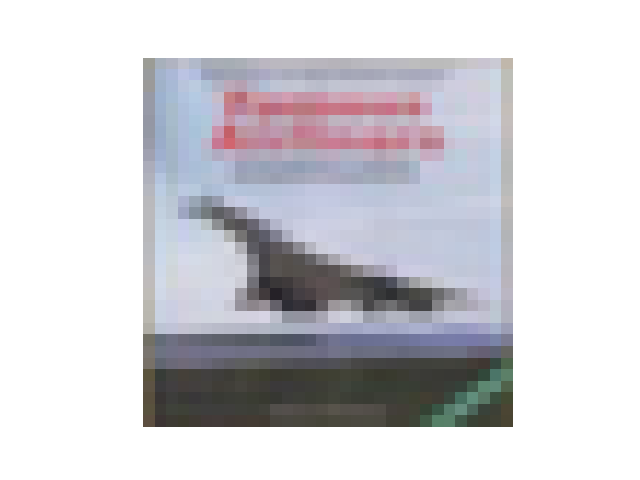

airplane


<IPython.core.display.Javascript object>


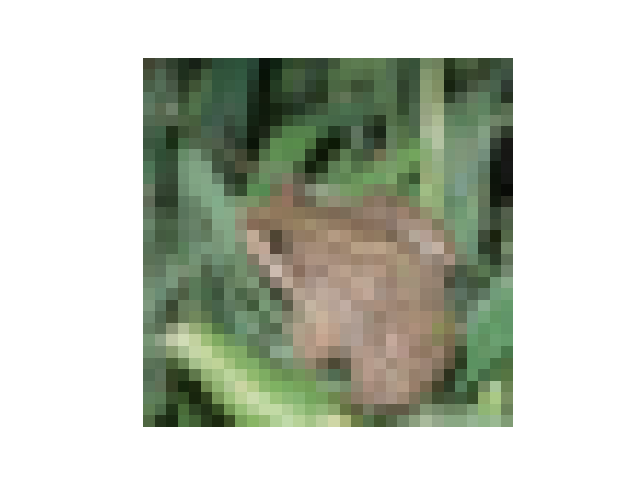

ship


<IPython.core.display.Javascript object>


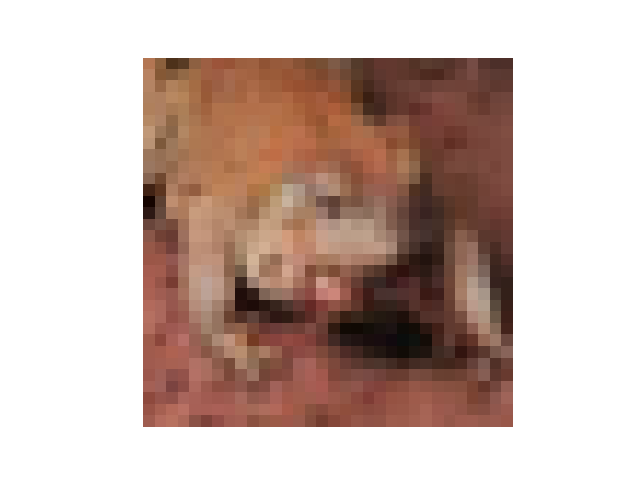

deer


<IPython.core.display.Javascript object>


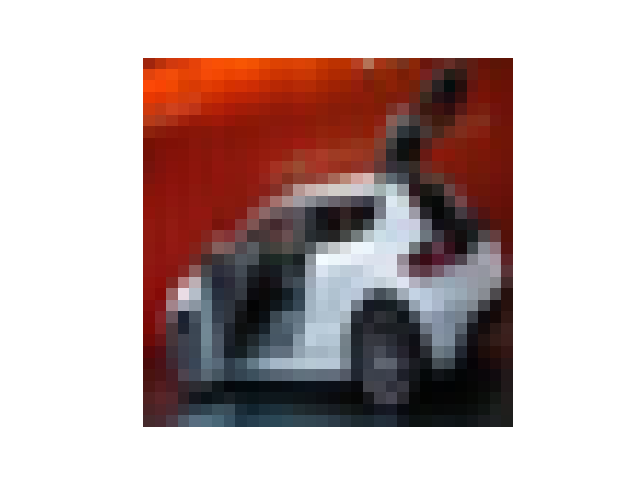

dog


<IPython.core.display.Javascript object>


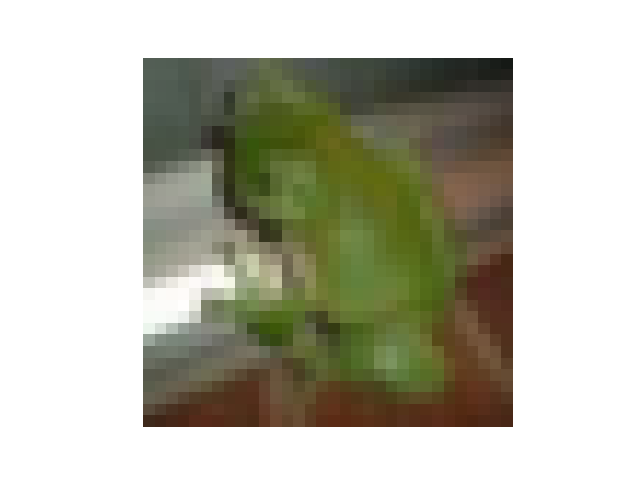

airplane


<IPython.core.display.Javascript object>


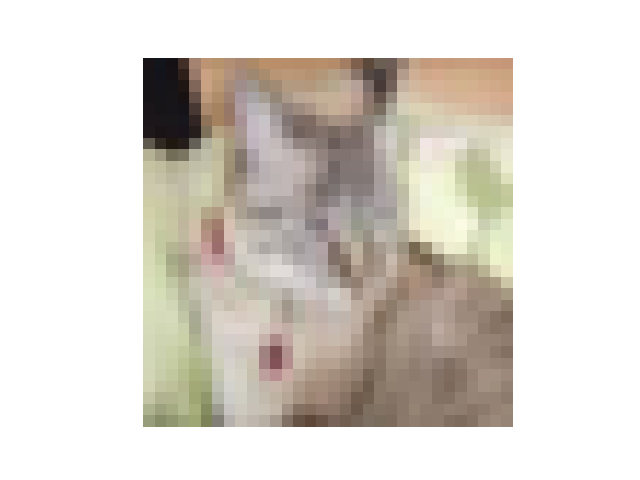

ship


<IPython.core.display.Javascript object>


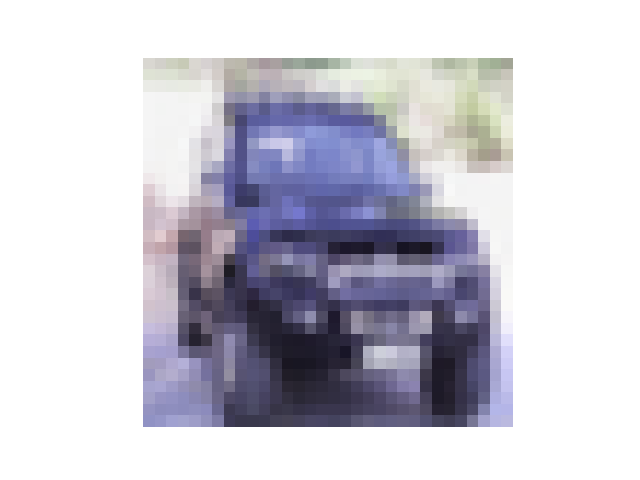

cat


<IPython.core.display.Javascript object>


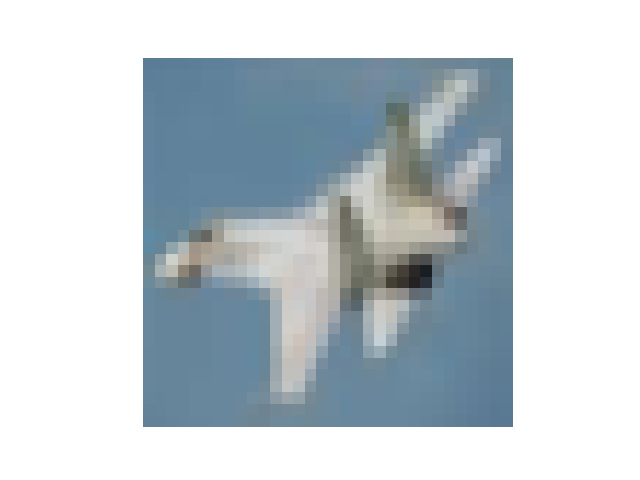

airplane


<IPython.core.display.Javascript object>


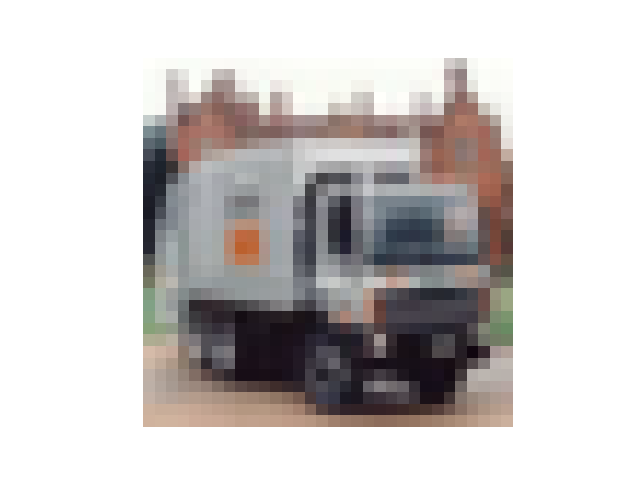

ship


<IPython.core.display.Javascript object>


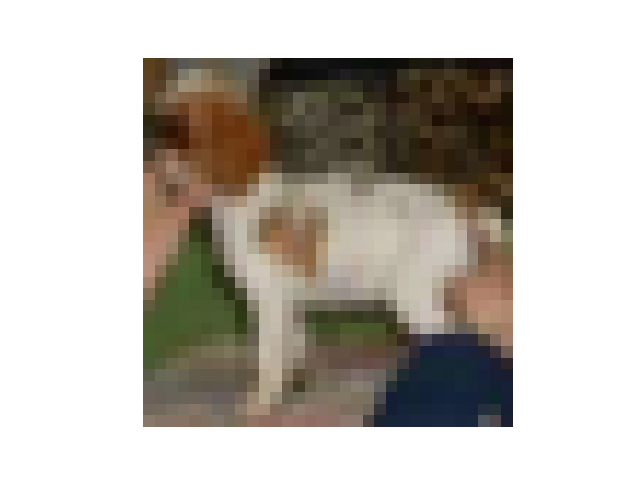

frog


<IPython.core.display.Javascript object>


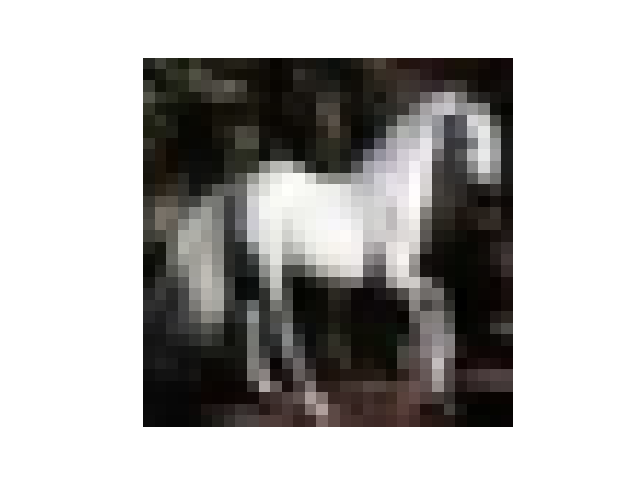

airplane


<IPython.core.display.Javascript object>


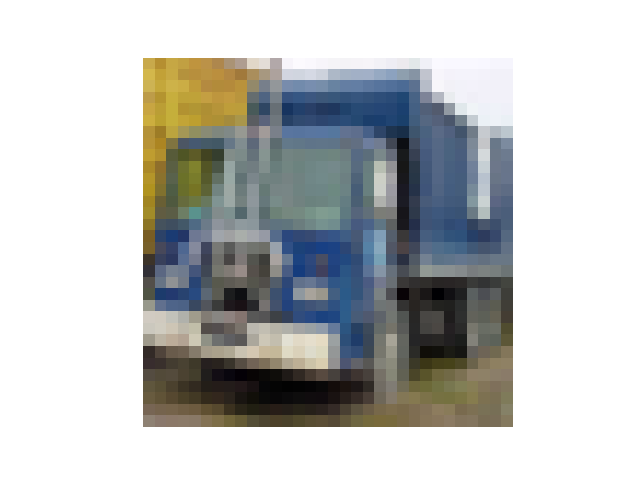

In [79]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(img_data, img_label_orig)

data_point_no = 15
sample_test_data = test_data[:data_point_no, :]

results = np.apply_along_axis(knn.predict_max, 1, sample_test_data)

for i, res in enumerate(results):
    print(res)
    plt.figure()
    plt.axis("off")
    
    image = sample_test_data[i].reshape((3, 32, 32))
    image = image.transpose((1, 2, 0))
    
    plt.imshow(image)
    plt.show()